<a href="https://colab.research.google.com/github/VadimUrupa1399/ML-with-Python/blob/master/Bayesian_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression

In [4]:
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.rand(n_samples, n_features)
lambda_ = 4
w = np.zeros(n_features)
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
  w[i] = stats.norm.rvs(loc=0, scale=1. /np.sqrt(lambda_))

alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
y = np.dot(X, w) + noise



In [5]:
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)
ols = LinearRegression()
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

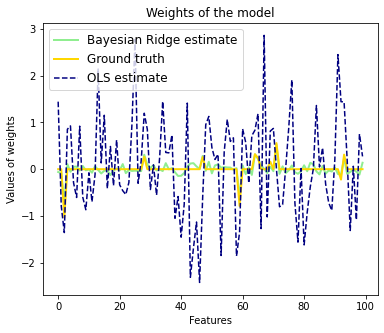

In [10]:
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw, label='Bayesian Ridge estimate')
plt.plot(w, color='gold', linewidth=lw, label='Ground truth')
plt.plot(ols.coef_, color='navy', linestyle='--', label='OLS estimate')
plt.xlabel('Features')
plt.ylabel('Values of weights')
plt.legend(loc='best', prop=dict(size=12))
plt.show()

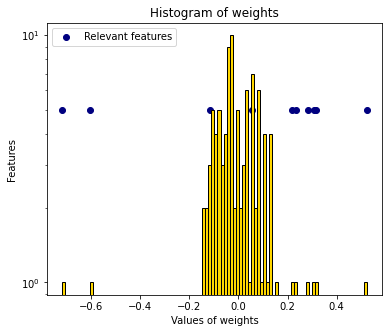

In [13]:
plt.figure(figsize=(6,5))
plt.title('Histogram of weights')
plt.hist(clf.coef_, bins=n_features, color='gold', log=True, edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
                                                  color='navy', label='Relevant features')
plt.xlabel('Values of weights')
plt.ylabel('Features')
plt.legend(loc='upper left')
plt.show()



Text(0, 0.5, 'Score')

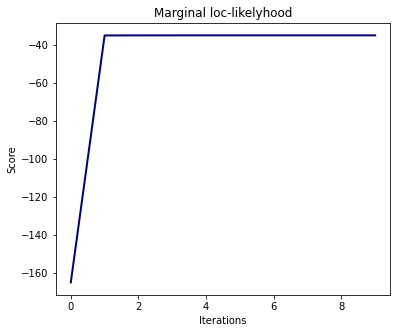

In [14]:
plt.figure(figsize=(6,5))
plt.title('Marginal loc-likelyhood')
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.xlabel('Iterations')
plt.ylabel('Score')

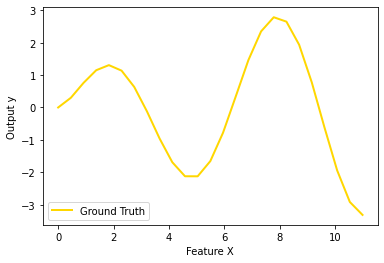

In [16]:
def f(x, noise_amount):
  y = np.sqrt(x) * np.sin(x)
  noise = np.random.normal(0, 1, len(x))
  return y+ noise_amount * noise

degree = 10
X= np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw, label='Ground Truth')
plt.xlabel('Feature X')
plt.ylabel('Output y')
plt.legend(loc='lower left')
plt.show()